# Make a CMD of the stars in `arcesetc`

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
import astropy.units as u

from arcesetc.util import archive

In [2]:
stars = list(archive)

In [3]:
with open('star_list.txt', 'w') as s: 
    s.write('\n'.join(stars))

In [13]:
# from astropy.coordinates import SkyCoord

# skycoords = []

# for star in stars: 
#     coord = SkyCoord.from_name(star)
#     skycoords.append(coord)

In [21]:
# from astroquery.gaia import Gaia

# radius = u.Quantity(30.0, u.arcsec)
# j = Gaia.cone_search_async(coord, radius)
# r = j.get_results()

# print('\n\n')

# r.pprint()

Submit this list of stars to Vizier and query [Gaia DR2](https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/345/gaia2&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa). Save the output as a TSV, then read it in: 

In [22]:
from astroquery.vizier import Vizier

v = Vizier()

In [38]:
from astropy.table import vstack, Column, hstack

tables = []

for star in stars: 
    try: 
        table = v.query_object(star, catalog='I/345/gaia2', radius=10*u.arcsec)[0]
        table.add_column(Column(len(table)*[star], name='Star'))
        tables.append(table)
    except IndexError:
        pass

tables = vstack(tables)

In [39]:
# from astropy.table import Table

# table = Table.read('vizier_table.tsv', format='ascii', delimiter='\t', data_start=3)

In [48]:
import numpy as np
# def to_float(a):
#     if isinstance(a, str):
#         if len(a.strip()) == 0: 
#             return np.nan
#     return float(a)

# for i in range(len(table['_1'])):
#     table['_1'][i] = str(table['_1'][i].strip())

# for col in table.colnames[1:]:
#     table[col] = np.array(list(map(to_float, table[col])))

In [47]:
groups = tables.group_by('Star')

In [48]:
rows = []
for group in groups.groups: 
    group.sort('Gmag')
    rows.append(group[0])

In [49]:
from astropy.table import vstack

singles_table = vstack(rows)

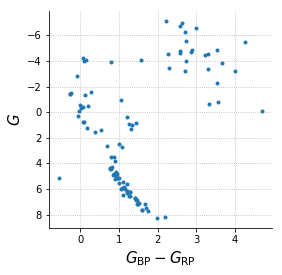

In [52]:
import numpy as np

color = singles_table['BPmag'] - singles_table['RPmag']
p = 1e-3 * singles_table['Plx']
abs_mag = singles_table['Gmag'] + 5 * (np.log10(p) + 1)

fontsize = 15
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(color, abs_mag, '.')
ax.set_xlabel('$G_{\\rm BP} - G_{\\rm RP}$', fontsize=fontsize)
ax.set_ylabel('$G$', fontsize=fontsize)
ax.invert_yaxis()
for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
ax.grid(ls=':')
fig.savefig('../docs/arcesetc/cmd.png', dpi=300, bbox_inches='tight')